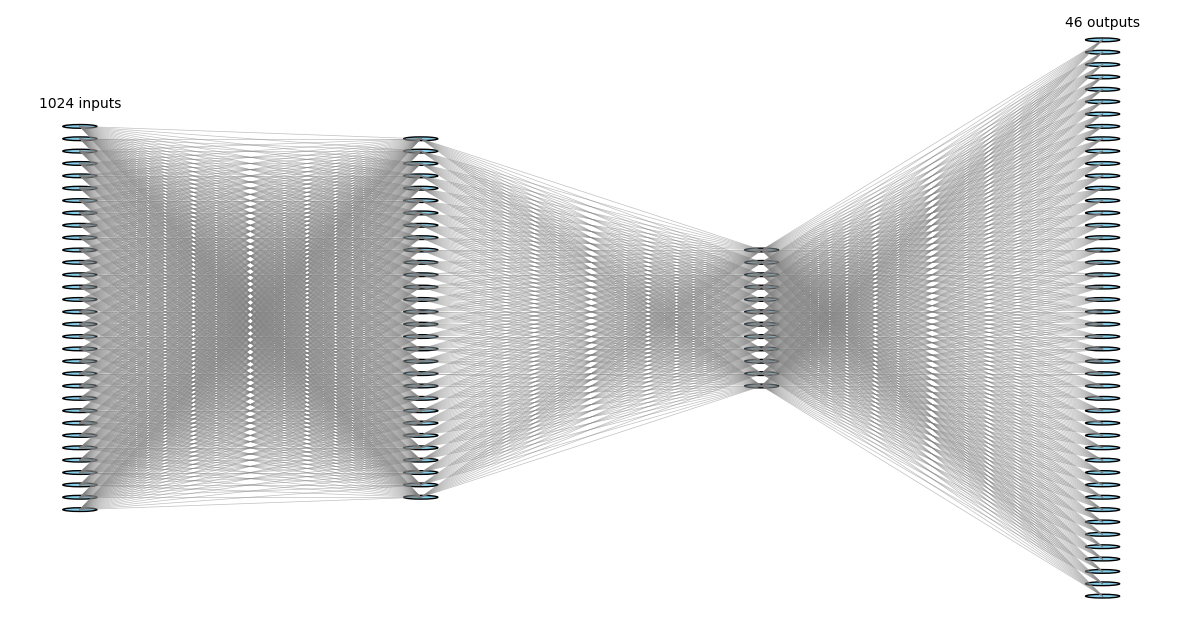

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Network architecture
# -------------------------------
layers = [1024, 30, 12, 46]  # example: input, hidden1, hidden2, output

# -------------------------------
# Visualization settings
# -------------------------------
max_display_input = 32      # number of neurons to draw for input layer
max_display_hidden = 30     # number of neurons to draw per hidden layer
v_spacing = 1.0             # vertical spacing
h_spacing = 3.0             # horizontal spacing
neuron_radius = 0.15        # circle radius

# -------------------------------
# Prepare figure
# -------------------------------
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')

# -------------------------------
# Function to draw a neuron
# -------------------------------
def draw_neuron(x, y, radius=neuron_radius, color='skyblue'):
    circle = plt.Circle((x, y), radius, fill=True, color=color, ec='k', lw=1)
    ax.add_patch(circle)

# -------------------------------
# Function to draw a layer of neurons
# -------------------------------
def draw_layer(x, n_neurons, max_neurons=None):
    neurons = []
    display_count = n_neurons if max_neurons is None else min(n_neurons, max_neurons)
    y_top = (display_count - 1) * v_spacing / 2
    for i in range(display_count):
        y = y_top - i * v_spacing
        draw_neuron(x, y)
        neurons.append((x, y))
    return neurons

# -------------------------------
# Draw all layers
# -------------------------------
layer_coords = []
for i, n in enumerate(layers):
    if i == 0:  # input
        coords = draw_layer(i*h_spacing, n, max_display_input)
        if n > max_display_input:
            ax.text(i*h_spacing, max_display_input/2 + 1, f"{n} inputs", ha='center', fontsize=10)
    elif i < len(layers)-1:  # hidden layers
        coords = draw_layer(i*h_spacing, n, max_display_hidden)
        if n > max_display_hidden:
            ax.text(i*h_spacing, max_display_hidden/2 + 0.5, f"{n} neurons", ha='center', fontsize=10)
    else:  # output
        coords = draw_layer(i*h_spacing, n)
        ax.text(i*h_spacing, n/2 + 0.5, f"{n} outputs", ha='center', fontsize=10)
    layer_coords.append(coords)

# -------------------------------
# Draw connections (sampled)
# -------------------------------
for l in range(len(layer_coords)-1):
    for (x1, y1) in layer_coords[l]:
        for (x2, y2) in layer_coords[l+1]:
            ax.plot([x1, x2], [y1, y2], 'gray', lw=0.5, alpha=0.5)

# -------------------------------
# Title and figure adjustments
# -------------------------------
# ax.set_title("Fully Connected Neural Network (sampled visualization)", fontsize=16)

# -------------------------------
# Save as SVG for Draw.io
# -------------------------------
plt.savefig("nn_visualization.svg", transparent=True, bbox_inches='tight')
plt.show()


In [5]:
import xml.etree.ElementTree as ET

def generate_drawio_nn(layers, max_input=32, max_hidden=46, spacing_x=200, spacing_y=50, filename="nn.drawio"):
    """
    Generate a .drawio editable neural network diagram
    layers: list of neuron counts per layer
    max_input/max_hidden: sample neurons for input/hidden layers for visualization
    spacing_x: horizontal spacing between layers
    spacing_y: vertical spacing between neurons
    """
    # Create mxGraphModel root
    mxfile = ET.Element('mxfile', attrib={'host': 'app.diagrams.net'})
    diagram = ET.SubElement(mxfile, 'diagram', attrib={'id': 'diagram1', 'name': 'Neural Network'})
    mxGraphModel = ET.SubElement(diagram, 'mxGraphModel')
    root = ET.SubElement(mxGraphModel, 'root')
    ET.SubElement(root, 'mxCell', attrib={'id': '0'})
    ET.SubElement(root, 'mxCell', attrib={'id': '1', 'parent': '0'})
    
    neuron_id = 2
    layer_coords = []

    # Draw neurons
    for i, n in enumerate(layers):
        if i == 0:
            display_n = min(n, max_input)
        elif i < len(layers) - 1:
            display_n = min(n, max_hidden)
        else:
            display_n = n
        coords = []
        y_top = (display_n - 1) * spacing_y / 2
        x = i * spacing_x
        for j in range(display_n):
            y = y_top - j * spacing_y
            # Create neuron
            cell = ET.SubElement(root, 'mxCell', attrib={
                'id': str(neuron_id),
                'value': '',
                'style': 'shape=ellipse;fillColor=#87CEEB;strokeColor=#000000;',
                'vertex': '1',
                'parent': '1'
            })
            geometry = ET.SubElement(cell, 'mxGeometry', attrib={'x': str(x), 'y': str(y), 'width': '30', 'height': '30', 'as': 'geometry'})
            neuron_id += 1
            coords.append(neuron_id - 1)
        layer_coords.append(coords)

    # Draw connections (optional: comment out if too crowded)
    for l in range(len(layer_coords) - 1):
        for src in layer_coords[l]:
            for tgt in layer_coords[l + 1]:
                cell = ET.SubElement(root, 'mxCell', attrib={
                    'id': str(neuron_id),
                    'style': 'edgeStyle=elbowEdgeStyle;rounded=0;orthogonalLoop=1;strokeColor=#888888;',
                    'edge': '1',
                    'parent': '1',
                    'source': str(src),
                    'target': str(tgt),
                    'value': ''
                })
                geometry = ET.SubElement(cell, 'mxGeometry', attrib={'relative': '1', 'as': 'geometry'})
                neuron_id += 1

    # Write to file
    tree = ET.ElementTree(mxfile)
    tree.write(filename, encoding='utf-8', xml_declaration=True)
    print(f"{filename} generated! Open it in Draw.io")

# Example usage:
layers = [1024, 30, 12, 46]
generate_drawio_nn(layers)


nn.drawio generated! Open it in Draw.io
